In [23]:
import asf_search as asf
import argparse
import sys
import os
import matplotlib.pyplot as plt
import xarray as xr
import subprocess


In [11]:
granule_list = [
    'S1B_IW_GRDH_1SDV_20190822T151551_20190822T151616_017700_0214D2_6084',
    'S1B_IW_GRDH_1SDV_20190810T151550_20190810T151615_017525_020F5A_2F74',
    'S1B_IW_GRDH_1SDV_20190729T151549_20190729T151614_017350_020A0A_C3E2',
    'S1B_IW_GRDH_1SDV_20190717T151548_20190717T151613_017175_0204EA_4181',
    'S1B_IW_GRDH_1SDV_20190705T151548_20190705T151613_017000_01FFC4_24EC',
    'S1B_IW_GRDH_1SDV_20190623T151547_20190623T151612_016825_01FA95_14B9',
    'S1B_IW_GRDH_1SDV_20190611T151546_20190611T151611_016650_01F566_D7CE',
    'S1B_IW_GRDH_1SDV_20190530T151546_20190530T151611_016475_01F02E_BF97',
    'S1B_IW_GRDH_1SDV_20190518T151545_20190518T151610_016300_01EAD8_9308',
    'S1B_IW_GRDH_1SDV_20190506T151544_20190506T151609_016125_01E56C_1D67'
]

product_list = [
    'S1A_IW_GRDH_1SDV_20190809T001336_20190809T001401_028485_033839_78A1-GRD_HD',
    'S1A_IW_GRDH_1SDV_20150322T000454_20150322T000524_005137_006794_56E3-GRD_HD',
    'S1A_IW_GRDH_1SDV_20160121T001256_20160121T001321_009585_00DF26_5B84-GRD_HD',
    'S1A_IW_GRDH_1SDV_20151117T000448_20151117T000513_008637_00C455_3DC2-GRD_HD'
]

In [ ]:
results = asf.granule_search(granule_list)

print(results)

In [ ]:
results = asf.granule_search(granule_list=granule_list)

print(f'{len(results)} results found')

In [ ]:
results = asf.granule_search('S1B_IW_GRDH_1SDV_20190822T151551_20190822T151616_017700_0214D2_6084')

print(f'{len(results)} results found')

In [ ]:
results = asf.product_search(product_list=product_list)
print(results)
print(f'{len(results)} results found')

In [25]:
import pandas as pd
def summarize_results(results):
    return pd.DataFrame([{
        'Scene': r.properties['fileName'],
        'Track': r.properties.get('track'),
        'Date': r.properties['startTime'][:10],
        'Polarization': r.properties.get('polarization'),
        'Path': r.properties['path'],
        'URL': r.properties['url']
    } for r in results])

In [4]:
import asf_search as asf

# AOI for Myanmar Earthquake
aoi_1 = 'POLYGON((95.4 21.4, 96.4 21.4, 96.4 22.4, 95.4 22.4, 95.4 21.4))'

# AOI for Switzerland Landslide
aoi_2 = 'POLYGON((7.7 46.2, 7.9 46.2, 7.9 46.6, 7.7 46.6, 7.7 46.2))'

# Search options for Sentinel-1, Myanmar
opts1 = {
    'platform': asf.PLATFORM.SENTINEL1,
    'processingLevel': asf.PRODUCT_TYPE.SLC,
    'start': '2025-03-10T00:00:00Z',
    'end':   '2025-04-15T23:59:59Z'
}

# Search options for Sentinel-1, Switzerland
opts2 = {
    'platform': asf.PLATFORM.SENTINEL1,
    'processingLevel': asf.PRODUCT_TYPE.SLC,
    'start': '2025-05-10T00:00:00Z',
    'end':   '2025-06-10T23:59:59Z'
}



In [5]:
# Run searches
results1 = asf.geo_search(intersectsWith=aoi_1, **opts1)
print(f'Myanmar: {len(results1)} results found')

results2 = asf.geo_search(intersectsWith=aoi_2, **opts2)
print(f'Switzerland: {len(results2)} results found')

Myanmar: 14 results found
Switzerland: 7 results found


In [ ]:
# Check how many results you have
print(f"Total: {len(results1)} results")

# Look at the first item
first_result = results1[0]
print(type(first_result))
print(dir(first_result))  # Attributes and methods
print(first_result.__dict__)  # Internal structure
print(first_result.properties.keys())  # All available property fields


In [ ]:
print(f"\n🔹 Myanmar: {len(results1)} results found")
for r in results1:
    p = r.properties
    print(f"{p['fileName']} | {p['startTime']} | {p['flightDirection']} | {p['beamModeType']} | {p['polarization']} | Track: {p['pathNumber']} | {p['url']}")

In [30]:
print(f"\n🔹 Switzerland: {len(results2)} results found")
for r in results2:
    p = r.properties
    print(f"{p['fileName']} | {p['startTime']} | {p['flightDirection']} | {p['beamModeType']} | {p['polarization']} | Track: {p['pathNumber']} | {p['url']}")


In [34]:
import csv

def save_as_csv(results, filename):
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = [
            'sceneName', 'startTime', 'stopTime', 'platform',
            'beamModeType', 'polarization', 'pathNumber',
            'frameNumber', 'flightDirection', 'url'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for r in results:
            p = r.properties
            writer.writerow({
                'sceneName': p.get('sceneName'),
                'startTime': p.get('startTime'),
                'stopTime': p.get('stopTime'),
                'platform': p.get('platform'),
                'beamModeType': p.get('beamModeType'),
                'polarization': p.get('polarization'),
                'pathNumber': p.get('pathNumber'),
                'frameNumber': p.get('frameNumber'),
                'flightDirection': p.get('flightDirection'),
                'url': p.get('url'),
            })


In [33]:
save_as_csv(results1, 'myanmar_s1_results.csv')
save_as_csv(results2, 'switzerland_s1_results.csv')


In [35]:
print(results1[0])

In [ ]:
# Search Based on Scene Geometry or Centroid 
# Geometry: exact polygon footprint of an existing scene as AOI. Returns scenes that overlap that exact footprint.
# Centroid: center point of a scene as AOI. Returns scenes whose footprints cover that point.


from shapely.geometry import shape
results = results1
opts = opts1
scene = results[0]
for mode in ['geometry', 'centroid']:
    if mode == 'geometry':
        aoi = shape(scene.geometry).wkt
    else:
        aoi = scene.centroid().wkt
    
    search_results = asf.geo_search(intersectsWith=aoi, **opts)
    print(f"{len(search_results)} found using {mode}")

for r in search_results:
    p = r.properties
    print(f"{p['fileName']} | {p['startTime']} | {p['flightDirection']} | {p['beamModeType']} | {p['polarization']} | Track: {p['pathNumber']} | {p['url']}")


38 found using geometry
9 found using centroid
S1A_IW_SLC__1SDV_20250415T113934_20250415T114001_058767_0747BF_F5A6.zip | 2025-04-15T11:39:34Z | ASCENDING | IW | VV+VH | Track: 70 | https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250415T113934_20250415T114001_058767_0747BF_F5A6.zip
S1A_IW_SLC__1SDV_20250412T232339_20250412T232406_058730_07463E_9BF7.zip | 2025-04-12T23:23:39Z | DESCENDING | IW | VV+VH | Track: 33 | https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250412T232339_20250412T232406_058730_07463E_9BF7.zip
S1A_IW_SLC__1SDV_20250405T233203_20250405T233230_058628_074211_B708.zip | 2025-04-05T23:32:03Z | DESCENDING | IW | VV+VH | Track: 106 | https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250405T233203_20250405T233230_058628_074211_B708.zip
S1A_IW_SLC__1SDV_20250403T113935_20250403T114002_058592_074094_0591.zip | 2025-04-03T11:39:35Z | ASCENDING | IW | VV+VH | Track: 70 | https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250403T113935_20250403T

In [ ]:
import os
import shutil

# Define base and subdirectories
base_dir = "slc_tops_test_subset"
subdirs = ["insar", "support_docs", "data", "data/slcs", "data/orbits"]

# Create directories if they don't exist
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

# Move .zip files (SLCs) and .EOF files (Orbits) to appropriate subfolders
data_dir = os.path.join(base_dir, "data")
slc_dir = os.path.join(data_dir, "slcs")
orbit_dir = os.path.join(data_dir, "orbits")

for filename in os.listdir(data_dir):
    full_path = os.path.join(data_dir, filename)
    if filename.endswith(".zip"):
        shutil.move(full_path, os.path.join(slc_dir, filename))
    elif filename.endswith(".EOF"):
        shutil.move(full_path, os.path.join(orbit_dir, filename))

# Display the updated directory structure (first two levels)
!tree -L 2 {base_dir}


slc_tops_test_subset
├── data
│   ├── orbits
│   └── slcs
├── insar
├── slc_tops_test_subset.csv
└── support_docs

5 directories, 1 file


In [41]:
# Configure ISCE2 python library
# https://github.com/isce-framework/isce2/issues/258
import isce
import logging

root_logger = logging.getLogger()
root_logger.setLevel('WARNING')

# Set Environment variables so that you can call ISCE2 Apps from the command line
os.environ['ISCE_HOME'] = os.path.dirname(isce.__file__)
os.environ['PATH']+='{ISCE_HOME}/bin:{ISCE_HOME}/applications'.format(**os.environ)

print('ISCE2 Version:', isce.__version__)

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
ISCE2 Version: 2.5.3


In [43]:
# Extract download URLs from results1
urls = [res.properties['url'] for res in results1]

for url in urls:
    print(url)


https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250415T113934_20250415T114001_058767_0747BF_F5A6.zip
https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250408T114746_20250408T114813_058665_07438A_16C7.zip
https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250408T114722_20250408T114748_058665_07438A_9C91.zip
https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250405T233203_20250405T233230_058628_074211_B708.zip
https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC.zip
https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250403T113935_20250403T114002_058592_074094_0591.zip
https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250327T114746_20250327T114813_058490_073C5E_FF9E.zip
https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250327T114721_20250327T114748_058490_073C5E_B388.zip
https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250324T233212_20250324T233239_058453_073AF4_1194.zip
h

In [44]:
# Confirm the processing level is SLC
for res in results1:
    print(res.properties['processingLevel'])  # Should print 'SLC'


SLC
SLC
SLC
SLC
SLC
SLC
SLC
SLC
SLC
SLC
SLC
SLC
SLC
SLC


In [46]:
for res in results1:
    p = res.properties
    print(f"Scene Name: {p['fileName']} | Baseline: {p.get('baseline', 'N/A')} | Acquisition Time: {p['startTime']}")

Scene Name: S1A_IW_SLC__1SDV_20250415T113934_20250415T114001_058767_0747BF_F5A6.zip | Baseline: N/A | Acquisition Time: 2025-04-15T11:39:34Z
Scene Name: S1A_IW_SLC__1SDV_20250408T114746_20250408T114813_058665_07438A_16C7.zip | Baseline: N/A | Acquisition Time: 2025-04-08T11:47:46Z
Scene Name: S1A_IW_SLC__1SDV_20250408T114722_20250408T114748_058665_07438A_9C91.zip | Baseline: N/A | Acquisition Time: 2025-04-08T11:47:22Z
Scene Name: S1A_IW_SLC__1SDV_20250405T233203_20250405T233230_058628_074211_B708.zip | Baseline: N/A | Acquisition Time: 2025-04-05T23:32:03Z
Scene Name: S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC.zip | Baseline: N/A | Acquisition Time: 2025-04-05T23:31:37Z
Scene Name: S1A_IW_SLC__1SDV_20250403T113935_20250403T114002_058592_074094_0591.zip | Baseline: N/A | Acquisition Time: 2025-04-03T11:39:35Z
Scene Name: S1A_IW_SLC__1SDV_20250327T114746_20250327T114813_058490_073C5E_FF9E.zip | Baseline: N/A | Acquisition Time: 2025-03-27T11:47:46Z
Scene Name: S

In [45]:
# Scene name = granule name = fileName without extension
for res in results1:
    print(res.properties['fileName'])  # e.g., 'S1A_IW_SLC__1SDV_20250405T233137_...zip'


S1A_IW_SLC__1SDV_20250415T113934_20250415T114001_058767_0747BF_F5A6.zip
S1A_IW_SLC__1SDV_20250408T114746_20250408T114813_058665_07438A_16C7.zip
S1A_IW_SLC__1SDV_20250408T114722_20250408T114748_058665_07438A_9C91.zip
S1A_IW_SLC__1SDV_20250405T233203_20250405T233230_058628_074211_B708.zip
S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC.zip
S1A_IW_SLC__1SDV_20250403T113935_20250403T114002_058592_074094_0591.zip
S1A_IW_SLC__1SDV_20250327T114746_20250327T114813_058490_073C5E_FF9E.zip
S1A_IW_SLC__1SDV_20250327T114721_20250327T114748_058490_073C5E_B388.zip
S1A_IW_SLC__1SDV_20250324T233212_20250324T233239_058453_073AF4_1194.zip
S1A_IW_SLC__1SDV_20250324T233147_20250324T233214_058453_073AF4_BD46.zip
S1A_IW_SLC__1SDV_20250322T113935_20250322T114002_058417_073988_9F68.zip
S1A_IW_SLC__1SDV_20250315T114746_20250315T114813_058315_073579_B6C8.zip
S1A_IW_SLC__1SDV_20250315T114721_20250315T114748_058315_073579_BEBC.zip
S1A_IW_SLC__1SDV_20250310T113934_20250310T114001_058242_07329D_3

In [ ]:
# Directory to save the downloaded granules
download_dir = os.path.join(base_dir, "data")

# Download the granules
for granule in results1:
    granule.download(path=download_dir)

print(f"Granules downloaded to {download_dir}")

In [ ]:
import requests

# Directory to save files
os.makedirs(slc_dir, exist_ok=True)

# Loop over results and download using requests with .netrc
for res in results1:
    url = res.properties['url']
    filename = res.properties['fileName']
    save_path = os.path.join(slc_dir, filename)

    if os.path.exists(save_path):
        print(f"File {filename} already exists. Skipping download.")
        continue
    # Print the URL and save path

    print(f"Downloading {filename}...")

    # Stream and save the file
    try:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()  # Raise error for bad responses (403, 404, etc.)
            with open(save_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    if chunk:
                        f.write(chunk)

        print(f"Saved to {save_path}")
    except Exception as e:
        print(f"Failed to download {filename}: {e}")
# Check if the files were downloaded successfully
for res in results1:
    filename = res.properties['fileName']
    save_path = os.path.join(download_dir, filename)
    if os.path.exists(save_path):
        print(f"File {filename} downloaded successfully.")
    else:
        print(f"File {filename} not found after download attempt.")
# Check the downloaded files
import os
downloaded_files = os.listdir(slc_dir)
print(f"Downloaded files in {slc_dir}:")
for file in downloaded_files:
    print(file)
# Check the size of the downloaded files
def check_file_sizes(directory):
    file_sizes = {}
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            file_sizes[filename] = os.path.getsize(filepath)
    return file_sizes
file_sizes = check_file_sizes(slc_dir)                 



# Print the number of downloaded files
print(f"Number of downloaded files: {len(downloaded_files)}")




File S1A_IW_SLC__1SDV_20250415T113934_20250415T114001_058767_0747BF_F5A6.zip already exists. Skipping download.
File S1A_IW_SLC__1SDV_20250408T114746_20250408T114813_058665_07438A_16C7.zip already exists. Skipping download.
File S1A_IW_SLC__1SDV_20250408T114722_20250408T114748_058665_07438A_9C91.zip already exists. Skipping download.
File S1A_IW_SLC__1SDV_20250405T233203_20250405T233230_058628_074211_B708.zip already exists. Skipping download.
File S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC.zip already exists. Skipping download.
File S1A_IW_SLC__1SDV_20250403T113935_20250403T114002_058592_074094_0591.zip already exists. Skipping download.
File S1A_IW_SLC__1SDV_20250327T114746_20250327T114813_058490_073C5E_FF9E.zip already exists. Skipping download.
File S1A_IW_SLC__1SDV_20250327T114721_20250327T114748_058490_073C5E_B388.zip already exists. Skipping download.
File S1A_IW_SLC__1SDV_20250324T233212_20250324T233239_058453_073AF4_1194.zip already exists. Skipping do

In [ ]:
# In case there are some files to be downloaded that are not in the results, you can download a specific obsolete granule.
# Directory to save the obsolete file
os.makedirs(slc_dir, exist_ok=True)

# URL and filename of the obsolete granule
filename = 'S1A_IW_SLC__1SDV_20250315T114746_20250315T114813_058315_073579_B6C8.zip'
url = f'https://datapool.asf.alaska.edu/SLC/SA/{filename}'
save_path = os.path.join(slc_dir, filename)

print(f"Trying to download: {filename}")
try:
    with requests.get(url, stream=True) as r:
        r.raise_for_status()  # Raise error for HTTP failures
        with open(save_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)
    print(f"Successfully downloaded to: {save_path}")
except requests.HTTPError as e:
    print(f"Download failed: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

Trying to download: S1A_IW_SLC__1SDV_20250315T114746_20250315T114813_058315_073579_B6C8.zip
Successfully downloaded to: ./slc_tops_test_subset/data/S1A_IW_SLC__1SDV_20250315T114746_20250315T114813_058315_073579_B6C8.zip


In [ ]:
import subprocess
from pathlib import Path

# Paths (already defined)
slc_dir = Path("slc_tops_test_subset/data/slcs")
orbit_dir = Path("slc_tops_test_subset/data/orbits")

# List all .zip granule files and strip the extension
granules = [f.stem for f in slc_dir.glob("S1*_IW_SLC__*.zip")]

print(f"Found {len(granules)} granules to fetch orbits for...")

# Loop through granules and fetch orbits
for granule in granules:
    try:
        print(f"Fetching orbit for: {granule}")
        subprocess.run(["fetchOrbit.py", "-i", granule, "-o", str(orbit_dir)], check=True)
    except subprocess.CalledProcessError as e:
        print(f"Failed to fetch orbit for {granule}: {e}")


Found 14 granules to fetch orbits for...
Fetching orbit for: S1A_IW_SLC__1SDV_20250322T113935_20250322T114002_058417_073988_9F68
Reference time:  2025-03-22 11:40:02
Satellite name:  S1A
generating a new access token
Fetching orbit for: S1A_IW_SLC__1SDV_20250403T113935_20250403T114002_058592_074094_0591
Reference time:  2025-04-03 11:40:02
Satellite name:  S1A
using saved access token
Fetching orbit for: S1A_IW_SLC__1SDV_20250324T233147_20250324T233214_058453_073AF4_BD46
Reference time:  2025-03-24 23:32:14
Satellite name:  S1A
using saved access token
Fetching orbit for: S1A_IW_SLC__1SDV_20250315T114721_20250315T114748_058315_073579_BEBC
Reference time:  2025-03-15 11:47:48
Satellite name:  S1A
using saved access token
Fetching orbit for: S1A_IW_SLC__1SDV_20250327T114746_20250327T114813_058490_073C5E_FF9E
Reference time:  2025-03-27 11:48:13
Satellite name:  S1A
using saved access token
Fetching orbit for: S1A_IW_SLC__1SDV_20250310T113934_20250310T114001_058242_07329D_35D1
Reference t

In [ ]:
# eof command to fetch orbits for Sentinel-1 SLC products
# ! This si not working ... 
# The issue is registered in Github https://github.com/scottstanie/sentineleof/issues/73 
from pathlib import Path
import subprocess

# Existing paths (you’ve already defined these earlier)
# slc_dir = Path("slc_tops_test_subset/data/slcs")
# orbit_dir = Path("slc_tops_test_subset/data/orbits")

# Extract unique dates from filenames
slc_files = list(slc_dir.glob("S1*_IW_SLC__*.zip"))

dates_by_mission = {"S1A": set(), "S1B": set()}
for file in slc_files:
    name_parts = file.name.split('_')
    mission = name_parts[0]
    date_str = name_parts[5][:8]  # e.g., "20250405"
    formatted_date = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
    if mission in dates_by_mission:
        dates_by_mission[mission].add(formatted_date)

# Run EOF command per mission/date
for mission, dates in dates_by_mission.items():
    for date in sorted(dates):
        cmd = [
            "eof",
            "--search-path", str(slc_dir),
            "--save-dir", str(orbit_dir),
            "--force-asf",
            "--mission", mission,
            "--date", date
        ]
        print("Running:", " ".join(cmd))
        try:
            subprocess.run(cmd, check=True)
        except subprocess.CalledProcessError as e:
            print(f"⚠️ Error on {mission} {date}: {e}")


In [94]:
!tree -L 3 -s slc_tops_test_subset/
!ls slc_tops_test_subset/data

21799.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[       4096]  slc_tops_test_subset/
├── [       4096]  data
│   ├── [       4096]  orbits
│   │   ├── [    4653280]  S1A_OPER_AUX_POEORB_OPOD_20250330T070553_V20250309T225942_20250311T005942.EOF
│   │   ├── [    4654759]  S1A_OPER_AUX_POEORB_OPOD_20250404T070554_V20250314T225942_20250316T005942.EOF
│   │   ├── [    4653935]  S1A_OPER_AUX_POEORB_OPOD_20250411T070555_V20250321T225942_20250323T005942.EOF
│   │   ├── [    4653210]  S1A_OPER_AUX_POEORB_OPOD_20250413T071128_V20250323T225942_20250325T005942.EOF
│   │   ├── [    4653388]  S1A_OPER_AUX_POEORB_OPOD_20250416T070546_V20250326T225942_20250328T005942.EOF
│   │   ├── [    4653265]  S1A_OPER_AUX_POEORB_OPOD_20250423T070913_V20250402T225942_20250404T005942.EOF
│   │   ├── [    4654586]  S1A_OPER_AUX_POEORB_OPOD_20250425T070625_V20250404T225942_20250406T005942.EOF
│   │   ├── [    4654751]  S1A_OPER_AUX_POEORB_OPOD_20250428T070559_V20250407T225942_20250409T005942.EOF
│   │   └── [    4654659]  S1A_OPER_AUX_POEORB_OPOD_20250505T070553_V

21804.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


orbits	slcs


In [96]:
from shapely.geometry import shape, Polygon

# Filter SLC results with IW mode and valid polygon footprint
valid_results = [
    r for r in results1
    if r.properties['processingLevel'] == 'SLC'
    and r.properties['beamModeType'] == 'IW'
    and isinstance(shape(r.geometry), Polygon)
]

# Pick the one with the largest spatial coverage
ref_scene = max(valid_results, key=lambda r: shape(r.geometry).area)

print("Selected reference scene:")
print(ref_scene.properties['sceneName'])


Selected reference scene:
S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC


In [98]:
from shapely.geometry import shape

# Print header
print(f"{'Scene Name':<80} | {'Footprint Area (deg²)':>20}")
print("-" * 105)

# Print area for each granule
for r in sorted(results1, key=lambda r: shape(r.geometry).area, reverse=True):
    scene = r.properties["sceneName"]
    area = shape(r.geometry).area
    print(f"{scene:<80} | {area:>20.6f}")


Scene Name                                                                       | Footprint Area (deg²)
---------------------------------------------------------------------------------------------------------
S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC              |             4.217336
S1A_IW_SLC__1SDV_20250324T233147_20250324T233214_058453_073AF4_BD46              |             4.113919
S1A_IW_SLC__1SDV_20250327T114746_20250327T114813_058490_073C5E_FF9E              |             4.095858
S1A_IW_SLC__1SDV_20250315T114746_20250315T114813_058315_073579_B6C8              |             4.095394
S1A_IW_SLC__1SDV_20250403T113935_20250403T114002_058592_074094_0591              |             4.073066
S1A_IW_SLC__1SDV_20250408T114746_20250408T114813_058665_07438A_16C7              |             4.072738
S1A_IW_SLC__1SDV_20250415T113934_20250415T114001_058767_0747BF_F5A6              |             4.072642
S1A_IW_SLC__1SDV_20250310T113934_20250310T114001_058242_07329

In [65]:
# Define bounding box and DEM URL
bbox = [22, 24, 94, 97]  # [South, North, West, East]
dem_url = "https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/"
output_dir = "slc_stack_test_subset/dem"

# Construct the dem.py command
cmd = [
    "dem.py",
    "-a", "stitch",
    "-b", str(bbox[0]), str(bbox[1]), str(bbox[2]), str(bbox[3]),
    "-s", "1",
    "-c",
    "-r",
    "-d", output_dir,
    "-u", dem_url
]
print("Command to run:", " ".join(cmd))

subprocess.run(cmd, check=True)

'''
dem.py -a stitch -b 20 25 93 99 -s 1 -c -r -u https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/
'''

Command to run: dem.py -a stitch -b 22 24 94 97 -s 1 -c -r -d slc_stack_test_subset/dem -u https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/
This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
API open (R): slc_stack_test_subset/dem/demLat_N22_N24_Lon_E094_E097.dem
API close:  slc_stack_test_subset/dem/demLat_N22_N24_Lon_E094_E097.dem
Writing geotrans to VRT for slc_stack_test_subset/dem/demLat_N22_N24_Lon_E094_E097.dem
GDAL open (R): slc_stack_test_subset/dem/demLat_N22_N24_Lon_E094_E097.dem.vrt
API open (WR): demLat_N22_N24_Lon_E094_E097.dem.wgs84

    << Geoid Correction I2 SRTM>>

Jet Propulsion Laboratory - 

'\ndem.py -a stitch -b 20 25 93 99 -s 1 -c -r -u https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/\n'

Reading DEM from: slc_stack_test_subset/dem/demLat_N20_N25_Lon_E093_E099.dem.wgs84.vrt


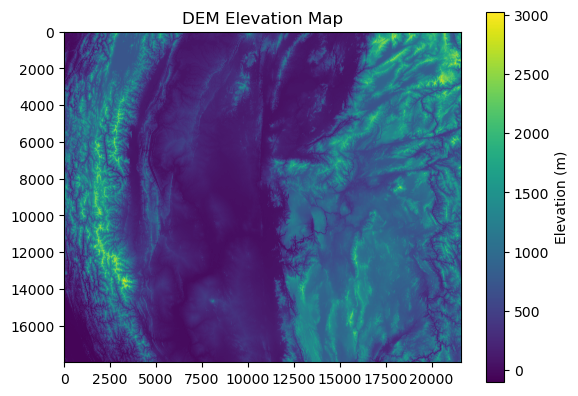

In [77]:

bbox = [20, 25, 93, 99]
dem_path = os.path.join(base_dir, "dem", "demLat_N20_N25_Lon_E093_E099.dem.wgs84.vrt")

print(f"Reading DEM from: {dem_path}")



import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open(dem_path) as src:
    data = src.read(1)  # read first band
    da = xr.DataArray(data)

plt.imshow(da, aspect=1)
plt.title(dem_path)
plt.colorbar(label="Elevation (m)")
plt.title("DEM Elevation Map")
plt.show()

plt.show()


In [ ]:

print("DEM Min:", np.nanmin(data))
print("DEM Max:", np.nanmax(data))




DEM Min: -99
DEM Max: 3022


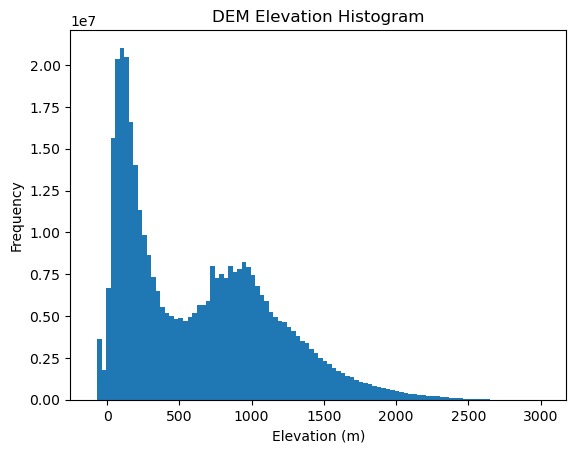

In [79]:
plt.hist(data.ravel(), bins=100)
plt.title("DEM Elevation Histogram")
plt.xlabel("Elevation (m)")
plt.ylabel("Frequency")
plt.show()




### InSAR Workflow 1: `stackSentinel` — Interferogram Generation via Valid Pairs

---
Following are required to start processing:

1) a folder that includes Sentinel-1 SLCs,
2) a DEM (Digital Elevation Model)
3) a folder that includes precise orbits (use dloadOrbits.py to download/ update your orbit folder. Missing orbits downloaded on the fly.)
4) a folder for Sentinel-1 Aux files (which is used for correcting the Elevation Antenna Pattern).

Note that stackSentinel.py does not process any data. It only prepares a lot of input files for processing and a lot of run files. Then you need to execute all those generated run files in order. To know what is really going on, after running stackSentinel.py, look at each run file generated by stackSentinel.py. Each run file actually has several commands that are independent from each other and can be executed in parallel. The config files for each run file include the processing options to execute a specific command/function.

Note also that run files need to be executed in order, i.e., running run_03 needs results from run_02, etc.

#### 🗂 Folder Structure Overview

```

slc_stack_test_subset/
├── data/
│   ├── slcs/            # 14 SLC zip links
│   └── orbits/          # Orbit file links
├── aux/                 # Optional auxiliary files for EAP correction
├── dem/
│   └── dem_10m.dem.wgs84 (symlinked)

#### ⚙️ Options & Configuration

- **Reference scene**: selected manually (e.g., largest footprint or clearest coverage).
- **Secondary scenes**:
  - All remaining scenes (1 vs N)
  - Or based on `stackSentinel` **Option 2**: `2-nearest neighbors` in time
- **Temporal and baseline thresholds**:
  - `maxTemporalBaseline = 48` days
  - `maxPerpendicularBaseline = 150` meters

Example command:
```bash
python select_s1_pairs_from_postgres.py \
  --ref_scene S1A_IW_SLC__1SDV_20250405T233137... \
  --strategy nearest2 \
  --max_btemp 48 --max_bperp 150 \
  --output_csv possible_pairs_bmax_tmax.csv
````

---

####  Important Notes

* Ensure DEM covers the full bounding box and is in WGS84.
* Scene names must match database entries or CSV metadata.
* Precise orbits must be available in the correct folder.
* You can optionally insert valid pairs directly into PostgreSQL.

---

```
m

In [ ]:

base_dir = "slc_stack_test_subset"
input_slcs = "slc_tops_test_subset/data/slcs"
input_orbits = "slc_tops_test_subset/data/orbits"
input_dem_dir = "slc_tops_test_subset/aux"


In [ ]:

os.makedirs(os.path.join(base_dir, "data", "slcs"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "data", "orbits"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "dem"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "aux"), exist_ok=True)

In [18]:
import glob

# Link SLCs
for file in glob.glob(os.path.join(input_slcs, "*.zip")):
    dst = os.path.join(base_dir, "data", "slcs", os.path.basename(file))
    if not os.path.exists(dst):
        os.symlink(file, dst)

# Link Orbits
for file in glob.glob(os.path.join(input_orbits, "*.EOF")):
    dst = os.path.join(base_dir, "data", "orbits", os.path.basename(file))
    if not os.path.exists(dst):
        os.symlink(file, dst)

In [117]:
# Link all DEMs with .dem.wgs84 extension
dem_candidates = [f for f in os.listdir(input_dem_dir)]
print(dem_candidates)
for dem_file in dem_candidates:
    dem_src = os.path.join(input_dem_dir, dem_file)
    dem_dst = os.path.join(base_dir, "dem", dem_file)
    if not os.path.exists(dem_dst):
        os.symlink(os.path.abspath(dem_src), dem_dst)

['demLat_N22_N24_Lon_E094_E097.dem.wgs84.xml', 'demLat_N22_N24_Lon_E094_E097.dem.xml', 'N23E094.hgt', 'N22E096.hgt', 'N22E094.hgt', 'N23E096.hgt', 'N22E095.hgt', 'demLat_N22_N24_Lon_E094_E097.dem.vrt', 'N23E095.hgt', 'demLat_N22_N24_Lon_E094_E097.dem.wgs84.vrt', 'demLat_N22_N24_Lon_E094_E097.dem']


In [ ]:
!stackSentinel.py \
  --num_proc 20 \
  --num_proc4topo 1 \
  -s /home/ubuntu/work/slc_stack_test_subset/data/slcs \
  -d /home/ubuntu/work/slc_stack_test_subset/dem/demLat_N20_N25_Lon_E093_E099.dem.wgs84 \
  -a /home/ubuntu/work/slc_stack_test_subset/aux \
  -o /home/ubuntu/work/slc_stack_test_subset/data/orbits \
  -b "22 24 94 97" \
  -c 2


29580.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
Number of SAFE files found: 14
Number of SAFE files to be used (cover BBOX): 11
*****************************************
Number of dates : 9
List of dates : 
['20250310', '20250315', '20250322', '20250324', '20250327', '20250403', '20250405', '20250408', '20250415']
date      south      north
20250310 20.99691 23.045589
20250315 20.871353 22.923561
20250322 20.996964 23.045547
20250324 20.12616 23.681543
20250327 20.871141 22.923479
20250403 20.9963 23.045126
20250405 20.743959 24.342783
20250408 20.871309 22.921352
20250415 20.996748 23.045382
***************************

In [19]:
# Change the reference to one with the largest area 
import customPlots  # your plotting module

base_dir = "slc_stack_test_subset"
run_dir = os.path.join(base_dir, "run_files")


In [20]:

# Reference date from the scene name (e.g., 20250405)
reference_date = "20250405"


In [ ]:

def run_step_and_plot(step_script_name, plot_func=None, *plot_args, **plot_kwargs):
    step_script = os.path.join(run_dir, step_script_name)
    if not os.path.exists(step_script):
        print(f"Step script {step_script_name} not found!")
        return False
    
    print(f"Running {step_script_name} with reference date {reference_date} ...")

    # Run the script passing -m <reference_date> as argument if required
    # Assuming your run scripts accept this argument; if not, update accordingly.
    result = subprocess.run(["bash", step_script, "-m", reference_date], capture_output=True, text=True)
    
    print(result.stdout)
    if result.returncode != 0:
        print(f"Error running {step_script_name}:")
        print(result.stderr)
        return False
    
    # Plot results if plotting function is provided
    if plot_func:
        print(f"Plotting results of {step_script_name} ...")
        plot_func(*plot_args, **plot_kwargs)
    
    return True


In [ ]:
# Change the processors' number


base_dir = "slc_stack_test_subset"
run_dir = os.path.join(base_dir, "run_files")

runfiles = [
    "run_01_unpack_topo_reference",
    "run_02_unpack_secondary_slc",
    "run_03_average_baseline",
    "run_04_extract_burst_overlaps",
    "run_05_overlap_geo2rdr",
    "run_06_overlap_resample",
    "run_07_pairs_misreg",
    # Add more as needed
]

for run in runfiles:
    run_path = os.path.join(run_dir, run)
    if not os.path.isfile(run_path):
        print(f"File not found: {run_path}")
        continue
    cmd = ["bash", run_path, "--num_proc", "20", "--num_proc4topo", "4"]
    if run == "run_07_pairs_misreg":
        cmd += ["-c", "2", "-z", "3", "-r", "9", "-f", "0.5"]
    print(f"Running {run} ...")
    subprocess.run(cmd)


In [127]:
# Check the free space and the the number of CPUs
import psutil
print(f"CPU cores: {os.cpu_count()}")
print(f"RAM total: {psutil.virtual_memory().total / 1024**3:.2f} GB")
print(f"RAM available: {psutil.virtual_memory().available / 1024**3:.2f} GB")

CPU cores: 64
RAM total: 125.78 GB
RAM available: 119.92 GB


In [ ]:
!ls slc_stack_test_subset/dem


96955.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


N22E094.hgt  demLat_N22_N24_Lon_E094_E097.dem
N22E095.hgt  demLat_N22_N24_Lon_E094_E097.dem.vrt
N22E096.hgt  demLat_N22_N24_Lon_E094_E097.dem.wgs84.vrt
N23E094.hgt  demLat_N22_N24_Lon_E094_E097.dem.wgs84.xml
N23E095.hgt  demLat_N22_N24_Lon_E094_E097.dem.xml
N23E096.hgt


In [ ]:

step1_script = os.path.join(run_dir, "run_01_unpack_topo_reference")

process = subprocess.Popen(
    ["bash", step1_script],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    bufsize=1,
)

# Stream output line-by-line
for line in iter(process.stdout.readline, ''):
    print(line, end='')  # end='' avoids double newlines

process.stdout.close()
process.wait()


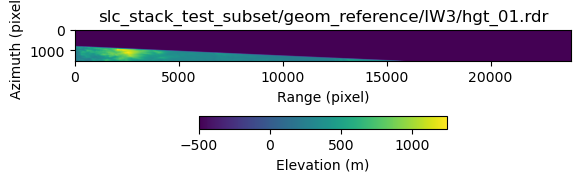

In [34]:
import rasterio
import xarray as xr
path = os.path.join(base_dir, 'geom_reference/IW3/hgt_01.rdr')

with rasterio.open(path) as src:
    data = src.read(1)  # read first band
    da = xr.DataArray(data)

plt.imshow(da, aspect=1)
plt.title(path)
plt.xlabel('Range (pixel)')
plt.ylabel('Azimuth (pixel)')

cb = plt.colorbar(orientation='horizontal', shrink=0.5)
cb.set_label('Elevation (m)')
plt.show()


<xarray.DataArray (dim_0: 1508, dim_1: 23857)>
array([[41.654564, 41.654762, 41.65496 , ..., 45.948025, 45.94819 ,
        45.948353],
       [41.654568, 41.654766, 41.654964, ..., 45.948025, 45.94819 ,
        45.948353],
       [41.654568, 41.654766, 41.654964, ..., 45.948025, 45.94819 ,
        45.948353],
       ...,
       [41.73297 , 41.733128, 41.73328 , ..., 45.94966 , 45.949825,
        45.94999 ],
       [41.733135, 41.73329 , 41.73344 , ..., 45.94966 , 45.949825,
        45.94999 ],
       [41.73323 , 41.733383, 41.733532, ..., 45.94966 , 45.949825,
        45.94999 ]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1


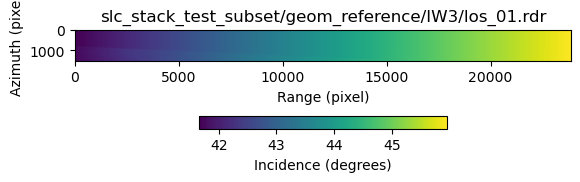

In [ ]:

path = os.path.join(base_dir, 'geom_reference/IW3/los_01.rdr')

with rasterio.open(path) as src:
    data = src.read(1)  # read first band
    da = xr.DataArray(data)
print(da) 

plt.imshow(da, aspect=1)
plt.title(path)
plt.xlabel('Range (pixel)')
plt.ylabel('Azimuth (pixel')
    
cb = plt.colorbar(orientation='horizontal', shrink=0.5);
cb.set_label('Incidence (degrees)')


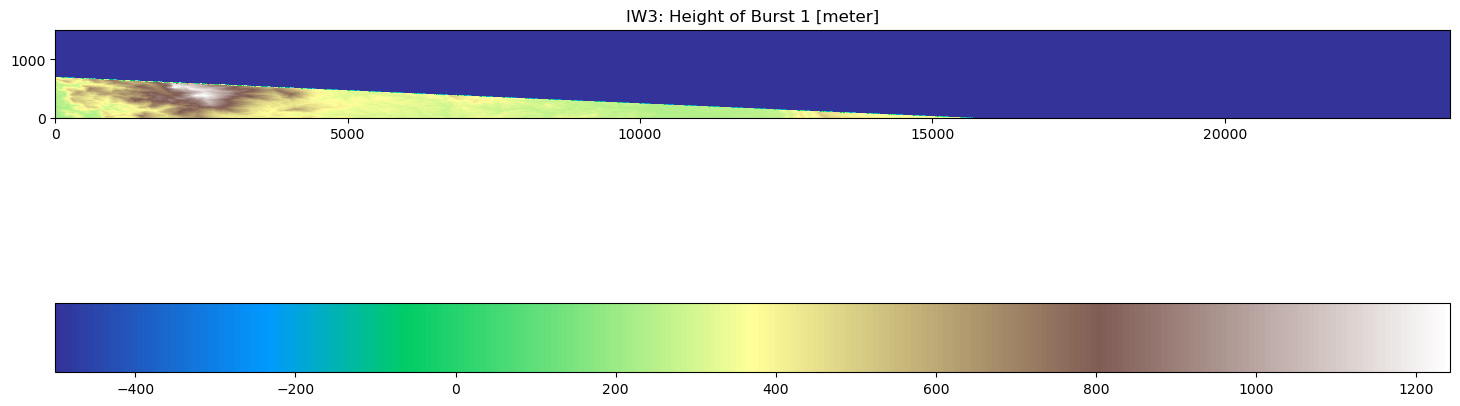

In [ ]:
import customPlots as cp

# Build path including the .vrt extension
path = os.path.join(base_dir, 'geom_reference/IW3/hgt_01.rdr.vrt')

# Plot using cp
cp.plotdata(path, band=1,
            title='IW3: Height of Burst 1 [meter]',
            colormap='terrain')


In [59]:

step2_script = os.path.join(run_dir, "run_02_unpack_secondary_slc")
print(f"Running {step2_script} ...")

process = subprocess.Popen(
    ["bash", step2_script],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    bufsize=1,
)

# Stream output line-by-line
for line in iter(process.stdout.readline, ''):
    print(line, end='')  # end='' avoids double newlines

process.stdout.close()
process.wait()


Running slc_stack_test_subset/run_files/run_02_unpack_secondary_slc ...


0

In [ ]:
from osgeo import gdal

# List all GDAL drivers
for i in range(gdal.GetDriverCount()):
    driver = gdal.GetDriver(i)
    print(driver.ShortName)


VRT
DERIVED
GTiff
COG
NITF
RPFTOC
ECRGTOC
HFA
SAR_CEOS
CEOS
JAXAPALSAR
GFF
ELAS
ESRIC
AIG
AAIGrid
GRASSASCIIGrid
ISG
SDTS
DTED
PNG
JPEG
MEM
JDEM
GIF
BIGGIF
ESAT
FITS
BSB
XPM
BMP
DIMAP
AirSAR
RS2
SAFE
PCIDSK
PCRaster
ILWIS
SGI
SRTMHGT
Leveller
Terragen
GMT
netCDF
HDF4
HDF4Image
ISIS3
ISIS2
PDS
PDS4
VICAR
TIL
ERS
JP2OpenJPEG
L1B
FIT
GRIB
RMF
WCS
WMS
MSGN
RST
INGR
GSAG
GSBG
GS7BG
COSAR
TSX
COASP
R
MAP
KMLSUPEROVERLAY
WEBP
PDF
Rasterlite
MBTiles
PLMOSAIC
CALS
WMTS
SENTINEL2
MRF
TileDB
PNM
DOQ1
DOQ2
PAux
MFF
MFF2
FujiBAS
GSC
FAST
BT
LAN
CPG
IDA
NDF
EIR
DIPEx
LCP
GTX
LOSLAS
NTv2
CTable2
ACE2
SNODAS
KRO
ROI_PAC
RRASTER
BYN
ARG
RIK
USGSDEM
GXF
DODS
KEA
BAG
HDF5
HDF5Image
NWT_GRD
NWT_GRC
ADRG
SRP
BLX
PostGISRaster
SAGA
XYZ
HF2
OZI
CTG
ZMap
NGSGEOID
IRIS
PRF
RDA
EEDAI
EEDA
DAAS
SIGDEM
TGA
OGCAPI
STACTA
GNMFile
GNMDatabase
ESRI Shapefile
MapInfo File
UK .NTF
LVBAG
OGR_SDTS
S57
DGN
OGR_VRT
REC
Memory
CSV
NAS
GML
GPX
LIBKML
KML
GeoJSON
GeoJSONSeq
ESRIJSON
TopoJSON
Interlis 1
Interlis 2
OGR_GMT
GPKG

In [ ]:
from osgeo import gdal
driver_count = gdal.GetDriverCount()
drivers = [gdal.GetDriver(i).LongName for i in range(driver_count)]
print("GDAL drivers:")
print(driver_count)
for d in drivers:
    if "zip" in d.lower():
        print(d)


GDAL drivers:
215


In [ ]:
from osgeo import gdal
print("VSIZIP support available:", gdal.GetConfigOption("GDAL_VSIL_ZIP", "YES"))


VSIZIP support available: YES


In [ ]:
from osgeo import gdal

filename = '/vsizip//home/ubuntu/work/slc_stack_test_subset/data/slcs/S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC.zip/S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC.SAFE/measurement/s1a-iw1-slc-vv-20250405t233137-20250405t233205-058628-074211-004.tiff'

ds = gdal.Open(filename)
if ds:
    print("Opened successfully with VSIZIP!")
else:
    print("Failed to open with VSIZIP.")


Opened successfully with VSIZIP!


In [ ]:
from osgeo import gdal

path = '/vsizip//home/ubuntu/work/slc_stack_test_subset/data/slcs/S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC.zip'
ds = gdal.Open(path)
print(ds)


None


ERROR 4: `/vsizip//home/ubuntu/work/slc_stack_test_subset/data/slcs/S1A_IW_SLC__1SDV_20250405T233137_20250405T233205_058628_074211_17EC.zip' not recognized as a supported file format.


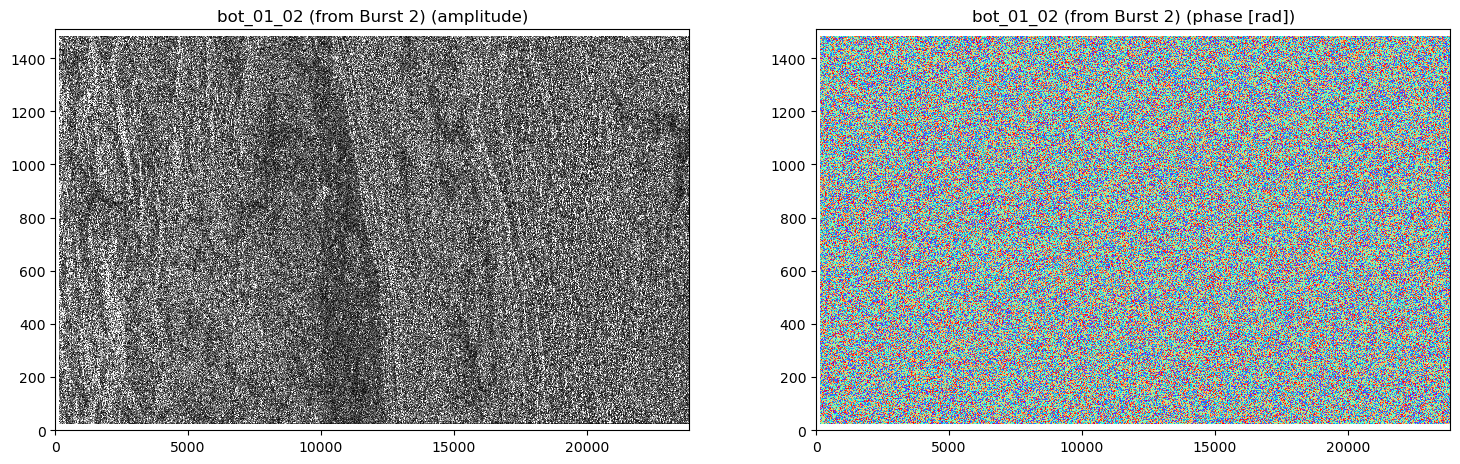

In [87]:
import rasterio
# Plotting the reference SLC data
# Ensure the reference SLC file exists


path = os.path.join(base_dir, 'reference/IW3/burst_01.slc.vrt')

cp.plotcomplexdata(path,
                title='bot_01_02 (from Burst 2)',
                aspect=10, datamin=0, datamax=200)


In [ ]:
import os
import subprocess

base_dir = "slc_stack_test_subset"
run_dir = os.path.join(base_dir, "run_files")
config_dir = os.path.join(base_dir, "configs")

# List of run scripts in the order they should be run (adjust as needed)
run_steps = [
    "run_01_unpack_topo_reference",
    "run_02_unpack_secondary_slc",
    "run_03_average_baseline",
    "run_04_extract_burst_overlaps",
    "run_05_overlap_geo2rdr",
    "run_06_overlap_resample",
    "run_07_pairs_misreg",
    "run_08_timeseries_misreg",
    "run_09_fullBurst_geo2rdr",
    "run_10_fullBurst_resample",
    "run_11_extract_stack_valid_region",
    "run_12_merge_reference_secondary_slc",
    "run_13_generate_burst_igram",
    "run_14_merge_burst_igram",
    "run_15_filter_coherence",
    "run_16_unwrap",
]

for step in run_steps:
    step_script = os.path.join(run_dir, step)
    if os.path.exists(step_script):
        print(f"Running {step} ...")
        # Run the script, capturing output for inspection
        result = subprocess.run(["bash", step_script], capture_output=True, text=True)
        print(result.stdout)
        if result.returncode != 0:
            print(f"Error in {step}:")
            print(result.stderr)
            break
    else:
        print(f"Script {step} not found, skipping.")


In [ ]:
import shutil
print(shutil.which("eof"))

In [ ]:
slc_dir = "./slc_tops_test_subset/data"
orbit_dir = "./slc_tops_test_subset/orbits"

!eof --search-path {slc_dir} --save-dir {orbit_dir} --force-asf


In [ ]:
import asf_search as asf

session = asf.ASFSession().auth_with_creds(None, None)

asf.download_urls(urls=urls, path='./slc_tops_test_subset/data', session=session, processes=4)
